In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lmfit import Model
from lmfit.models import ConstantModel, LorentzianModel, LinearModel
from lmfit.lineshapes import lorentzian 

In [5]:
def open_csv_file(filename):
    # Load the CSV file, skipping 23 rows
    data = np.genfromtxt(filename, delimiter=',', skip_header=22, names=True)
    
    #filter for channel values over 500
    data = data[data['Channel'] < 500]
    
    # Select the desired columns
    counts = data['Counts']
    channel = data['Channel']
    
    velocity = (channel*0.04406) - 11.2
    # Return the selected columns
    return counts, channel, velocity
    

#QUAD SPLITTING
#Loading the data
counts, channel, velocity = open_csv_file("splitting.csv")

ydata = counts
xdata = velocity

In [3]:
def lorent_model(peaks, amplitudes, sigmas, center):
    model = ConstantModel()
    params = model.make_params(c=center)
    print(params)
    for i in range(len(peaks)):
        prefix = f'p{i+1}_'
        peak_model = LorentzianModel(prefix=prefix)
        model += peak_model

        # Use the same prefix when setting parameter values
        params.add(f'{prefix}center', value=peaks[i])
        params.add(f'{prefix}amplitude', value=amplitudes)
        params.add(f'{prefix}sigma', value=sigmas)
    
        
    return model, params

Parameters([('c', <Parameter 'c', value=76000, bounds=[-inf:inf]>)])
[[Model]]
    ((Model(constant) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 92
    # data points      = 500
    # variables        = 7
    chi-square         = 44177879.0
    reduced chi-square = 89610.3022
    Akaike info crit   = 5708.56332
    Bayesian info crit = 5738.06558
    R-squared          = 0.91289667
[[Variables]]
    c:             75473.4558 +/- 14.6647305 (0.02%) (init = 76000)
    p1_center:    -0.42801752 +/- 0.00484049 (1.13%) (init = -0.5)
    p1_amplitude: -3782.13190 +/- 102.539081 (2.71%) (init = -5000)
    p1_sigma:      0.18899177 +/- 0.00705453 (3.73%) (init = 0.5)
    p2_center:     1.26027601 +/- 0.00462331 (0.37%) (init = 2)
    p2_amplitude: -3114.33741 +/- 93.9108951 (3.02%) (init = -5000)
    p2_sigma:      0.16103148 +/- 0.00670959 (4.17%) (init = 0.5)
[[Correlations]] (unreported cor

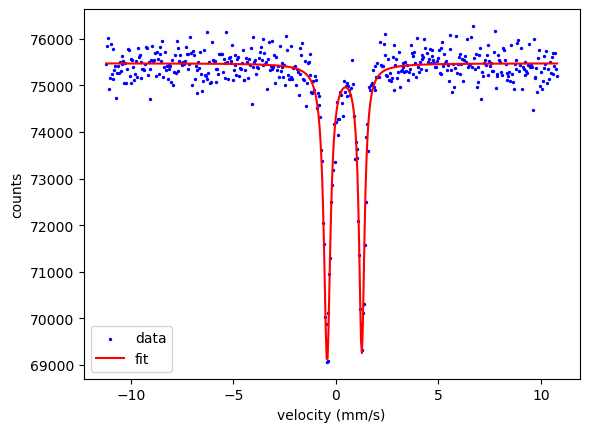

In [8]:
#Example usage:
peaks = [-0.5,2]
model, params = lorent_model(peaks, amplitudes=-5000, sigmas=0.5, center=76000)


result = model.fit(ydata, params=params, x=xdata)

print(result.fit_report(min_correl=.5))

plt.scatter(xdata, ydata, label='data', s=2, c='b')
plt.plot(xdata, result.best_fit, 'r-', label='fit')
plt.xlabel("velocity (mm/s)")
plt.ylabel('counts')
plt.legend()
plt.show()